In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import re

#from wordcloud import WordCloud
import matplotlib.pyplot as plt
from string import punctuation
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from nltk.corpus import stopwords


In [182]:
!pip install wordcloud

In [2]:
from wordcloud import WordCloud

In [3]:
fake = pd.DataFrame(pd.read_excel('./politics_fake2016.xlsx'))

In [4]:
fake.head()

title  \
0  TRUMP DITCHES PRESS To Make “Last Minute” Surp...   
1  COUNTDOWN TICKER: Obama Leaves Office In…5,4,3...   
2  BOOM! TOMI LAHREN’S Top Tips For Liberals In 2...   
3          YES, OBAMA…There Is A Magic Wand! [Video]   
4  HA! DONALD TRUMP’S Unusual New Year’s Tweet To...   

                                                text   subject       date  
0  President-elect Donald Trump played a round of...  politics 2016-12-31  
1  (function(){ var s=document.createElement('scr...  politics 2016-12-31  
2                                                     politics 2016-12-31  
3                                                     politics 2016-12-31  
4  President-elect Donald Trump is throwing a pri...  politics 2016-12-31

In [5]:
fake['label']='Fake'

In [6]:
true = pd.DataFrame(pd.read_excel('./politics_true2016.xlsx'))

In [7]:
true0 = pd.DataFrame(pd.read_csv('./true.csv'))
fake0 = pd.DataFrame(pd.read_csv('./fake.csv'))

In [8]:
true0.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [9]:
fake0.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [61]:
fake_politics = fake0[fake0.subject.isin(['Government News', 'politics'])]

In [83]:
fake_politics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8411 entries, 9050 to 17460
Data columns (total 4 columns):
title      8411 non-null object
text       8411 non-null object
subject    8411 non-null object
date       8411 non-null object
dtypes: object(4)
memory usage: 648.6+ KB


In [91]:
test = fake0[fake0.subject.isin(['politics'])].iloc[0:2]

In [121]:
test2 = fake0[fake0.subject.isin(['politics'])]

In [131]:
test2

title  \
9050   Democrat Senator Warns Mueller Not To Release ...   
9051   MSNBC ANCHOR Flabbergasted at What Texas Teach...   
9052   WATCH: SNOWFLAKES ASKED Communist Party Platfo...   
9053   JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...   
9054   DOJ’s JEFF SESSIONS Opens Investigation Into W...   
9055   WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...   
9056   GOTCHA! A Stammering John Podesta Stunned by a...   
9057   HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...   
9058   IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...   
9059   BUSTED! Maxine Waters’ Ties to Black Nationali...   
9060   LOCAL REPORTER IN DEEP BLUE STATE Stuns Libera...   
9061   FACEBOOK RELEASES Ads Paid For By Russians…And...   
9062   FACEBOOK’S VP Of Ads BLASTS MEDIA: Majority Of...   
9063   MEGHAN MCCAIN Cut-Off After Saying the Florida...   
9064   BROTHER OF HERO COACH Breaks Down Over Tribute...   
9065   “THE TRUMP CURSE IS REAL”…Social Media Respond...   
9066   How The Left, The Anti Defamation League and M...   
9067   LOOK WHO Approved Visas For Russian Operatives...   
9068   JUST IN: PRESIDENT TRUMP AND FIRST LADY Make S...   
9069   BREAKING: FL GOV RICK SCOTT Calls for FBI Dire...   
9070   HEY, BERNIE SANDERS: 18 SCHOOL SHOOTINGS Have ...   
9071   TUCKER CARLSON Rips The Left On Gun Control Hy...   
9072   WATCH: Mitt Romney Announces Run for Senate…Ba...   
9073   WATCH SHERIFF’S Honest Response After a School...   
9074   Flashback Video: Susan Rice Says Trump’s Claim...   
9075   POLITICS FIRST: LEFTIST PARENTS Of Former Comb...   
9076   TWO HIGH SCHOOL JROTC Members Tell INCREDIBLE ...   
9077   MEDIA PROMOTES Fake News That Shooter Connecte...   
9078   WHAT’S WRONG WITH PELOSI? Nancy Stutters, Stam...   
9079   “PROUD TRANSGENDER” Democrat Candidate For Con...   
...                                                  ...   
15861  BREAKING: TWO RUSSIAN NAVY SPY SHIPS OPERATING...   
15862  OBAMA’S OPEN BORDER POLICY COMES WITH SERIOUS ...   
15863  [VIDEO] HUNDREDS OF MORMON FUNDAMENTALISTS SUR...   
15864  WATCH WHAT HAPPENS WHEN CHRISTIAN MAN ASKS 13 ...   
15865  SHOCKING: Why Our Fed Government Will Grant “D...   
15866   A MUST READ: OBAMA’S TREASON GOES INTO OVERDRIVE   
15867  BROTHER OF FAMOUS ACTRESS PRETENDS TO BE BLACK...   
15868  WHY IS THE PRESENCE OF RUSSIAN AIRCRAFT FIGHTE...   
15869  TROLL CONGRESSWOMAN WANTS YOU TO SELL YOUR GUN...   
15870  (VIDEO) UN CLIMATE CHANGE FREAKS: “We should m...   
15871  SHERIFF WON’T ENFORCE GUN CONTROL LAW HE CALLS...   
15872  ILLEGAL INVASION CONTINUES: NYC RAMPING UP TO ...   
15873  ILLEGAL ALIEN WITH DRUG RESISTANT TB TO BE REL...   
15874  NO TOILET PAPER?! SOCIALISM IS IN ITS FINAL ST...   
15875     HYSTERICAL VIDEO: SATURDAY NIGHT LIVE DOES CNN   
15876  MarkLevin is Freaking Awesome: Obama negotiate...   
15877  FLASHBACK: Female Terrorist Who Planned To Blo...   
15878  WELCOME TO AMERICA: Most Refugees Are On Food ...   
15879            LISTEN TO THIS FORMER DOJ WHISTLEBLOWER   
15880  POLITICAL HACK RIHANNA SINGS “We are the new A...   
15881  FED’S PREVENT ‘Mother of the Year’ From Boardi...   
15882  [Video] COLLEGE STUDENT BULLIED AFTER TAKING P...   
15883  IS ISIS IN DANGER OF BEING WIPED OUT BY A FLES...   
15884  MUSLIM WOMAN ARRESTED FOR SPITTING ON HER FELL...   
15885  FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...   
15886  APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...   
15887  WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...   
15888  OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY   
15889  BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...   
15890  HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...   

                                                    text   subject  \
9050   According to The Hill, Democrat Senator Bob Ca...  politics   
9051   If we protect every other government building ...  politics   
9052   Ami Horowitz is fantastic! Check out this man ...  politics   
9053   Just one more reminder of why President Tru

In [127]:
def change_date(date):
    if "-" in date:
        date = datetime.datetime.strptime(test1,'%d-%b-%y').strftime('%m-%d-%Y')
    return date

In [130]:
change_date(test3)

'April, 18, 2015'

In [129]:
test3 = 'April, 18, 2015'

In [112]:
test1 = test['date'].iloc[1]

In [123]:
test1 = '19-Feb-18'

In [125]:
datetime.datetime.strptime(test1,'%d-%b-%y').strftime('%m-%d-%Y')

'02-19-2018'

In [81]:
fake_politics.loc[9065]

title      “THE TRUMP CURSE IS REAL”…Social Media Respond...
text       Two months before the Winter Olympics in Seoul...
subject                                             politics
date                                               17-Feb-18
Name: 9065, dtype: object

In [62]:
len(fake_politics)

8411

In [60]:
fake_politics.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

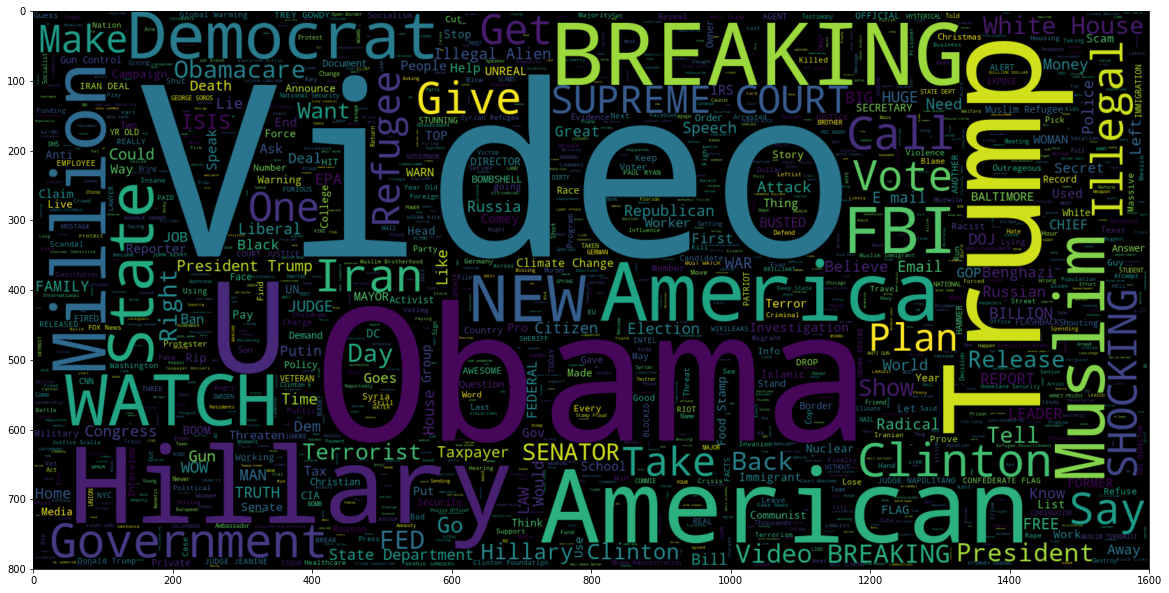

In [26]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop).generate(" ".join(Government_News.title))
plt.imshow(wc , interpolation = 'bilinear')

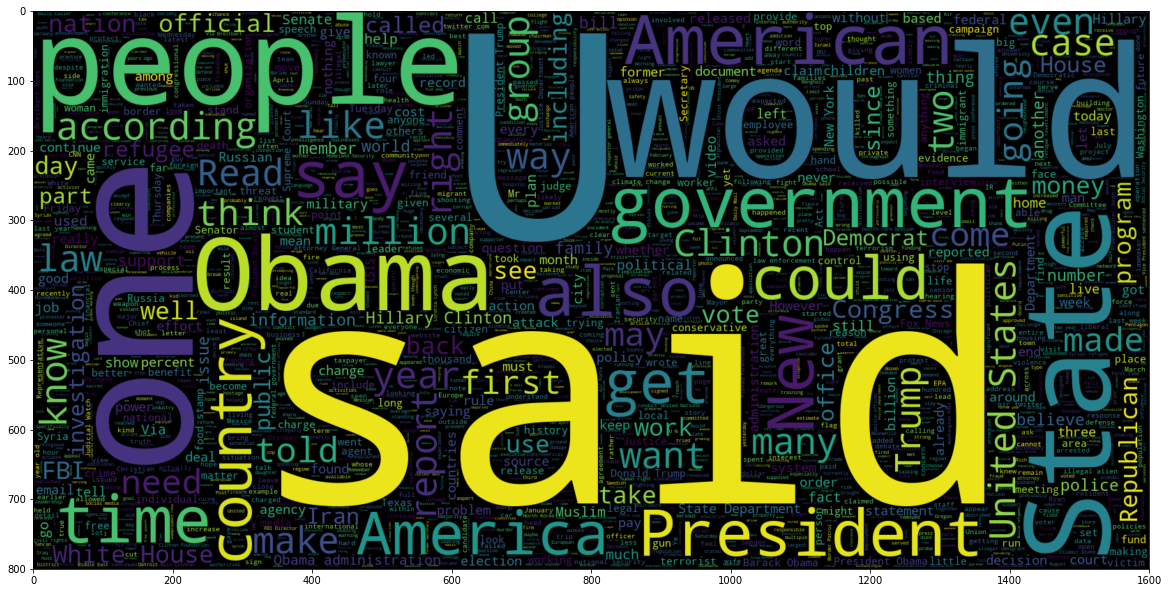

In [27]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop).generate(" ".join(Government_News.text))
plt.imshow(wc , interpolation = 'bilinear')

In [197]:
len(fake0.iloc[11]['text'])

1625

In [142]:
true.head()

title  \
0  Mormon Tabernacle Choir member resigns rather ...   
1  Obama to meet lawmakers in attempt to protect ...   
2  Lockheed Martin wins $450 million Pentagon con...   
3  Trump fans' 'Deploraball' party shows rift in ...   
4  Obama sanctions Russia for intervening in 2016...   

                                                text       subject  \
0  (Reuters) - A member of the Mormon Tabernacle ...  politicsNews   
1  WASHINGTON (Reuters) - President Barack Obama ...  politicsNews   
2  WASHINGTON (Reuters) - Lockheed Martin Corp ha...  politicsNews   
3  NEW YORK (Reuters) - Supporters of U.S. Presid...  politicsNews   
4  HONOLULU (Reuters) - President Barack Obama on...  politicsNews   

                  date  
0  2016-12-30 00:00:00  
1  2016-12-30 00:00:00  
2  2016-12-29 00:00:00  
3  2016-12-29 00:00:00  
4  2016-12-29 00:00:00

In [143]:
true['label']='True'

In [144]:
news=fake.append(true)

In [145]:
news.head()

title  \
0  TRUMP DITCHES PRESS To Make “Last Minute” Surp...   
1  COUNTDOWN TICKER: Obama Leaves Office In…5,4,3...   
2  BOOM! TOMI LAHREN’S Top Tips For Liberals In 2...   
3          YES, OBAMA…There Is A Magic Wand! [Video]   
4  HA! DONALD TRUMP’S Unusual New Year’s Tweet To...   

                                                text   subject  \
0  President-elect Donald Trump played a round of...  politics   
1  (function(){ var s=document.createElement('scr...  politics   
2                                                     politics   
3                                                     politics   
4  President-elect Donald Trump is throwing a pri...  politics   

                  date label  
0  2016-12-31 00:00:00  Fake  
1  2016-12-31 00:00:00  Fake  
2  2016-12-31 00:00:00  Fake  
3  2016-12-31 00:00:00  Fake  
4  2016-12-31 00:00:00  Fake

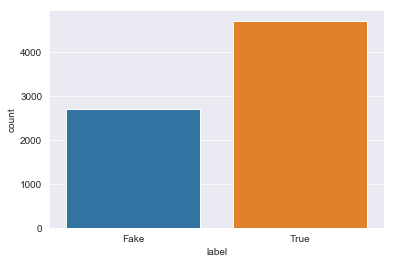

In [146]:
sns.set_style("darkgrid")
sns.countplot(news.label)

In [25]:
#data cleaning

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


In [148]:
def strip_html(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip().lower())
    return " ".join(final_text)

#Removing punctuation
def remove_punctuation(text):
    pattern = '[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+'
    text = re.sub(pattern,'',text)
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    text.lower()
    return text


In [149]:
#Apply function on text and title column
news['text']=news['text'].apply(denoise_text)
news['title']=news['title'].apply(denoise_text)

C:\Users\Administrator\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://www.youtube.com/watch?v=IioEIUmawRo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Administrator\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://www.youtube.com/watch?v=31MRqr9ydUU" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Administrator\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://www.youtube.com/watch?v=wYdX071Nlow" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the doc

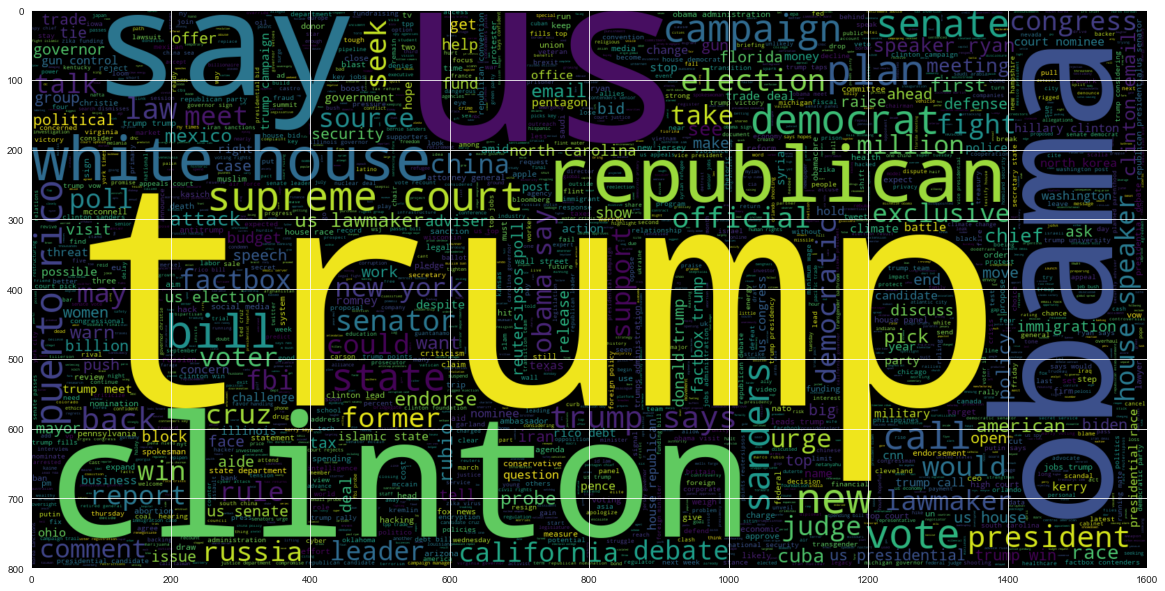

In [75]:
#wordcloud based on title
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop).generate(" ".join(news[news.label == 'True'].title))
plt.imshow(wc , interpolation = 'bilinear')

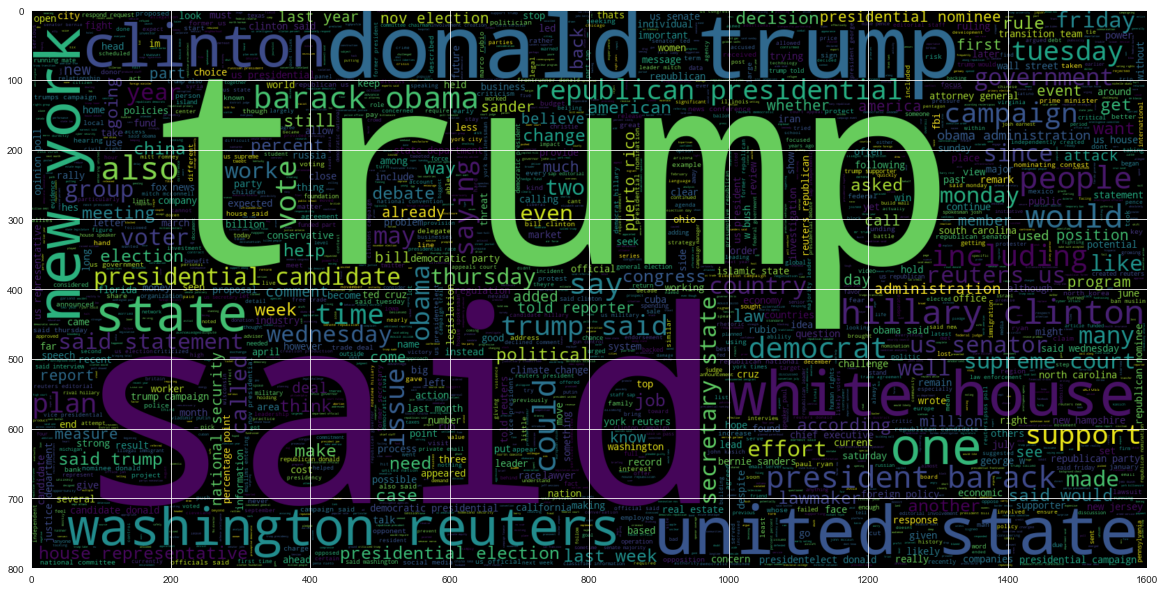

In [76]:
#wordcloud based on text
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop).generate(" ".join(news[news.label == 'True'].text))
plt.imshow(wc , interpolation = 'bilinear')

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\_methods.py:

ValueError: cannot convert float NaN to integer

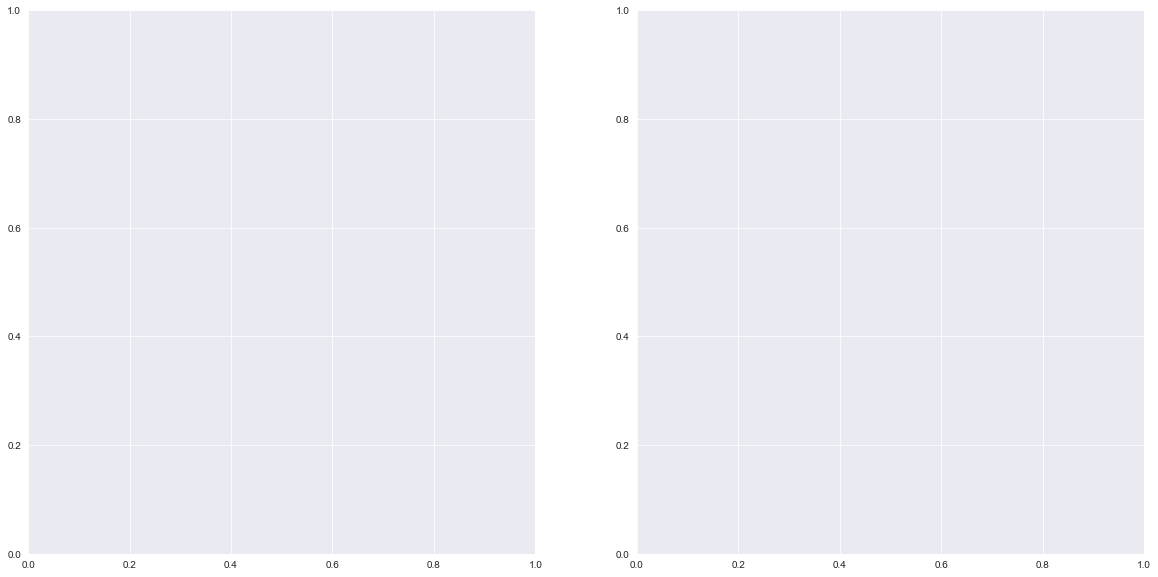

In [15]:
# I got errors for the following codes

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=news[news['label']=='True']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=news[news['label']=='Fake']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [150]:
news.head(5)

title  \
0  trump ditches press make “last minute” surpris...   
1     countdown ticker obama leaves office in…54321…   
2           boom tomi lahrens top tips liberals 2017   
3                         yes obama…there magic wand   
4  ha donald trumps unusual new years tweet “many...   

                                                text   subject  \
0  presidentelect donald trump played round golf ...  politics   
1  function var sdocumentcreateelementscriptssrcw...  politics   
2                                                     politics   
3                                                     politics   
4  presidentelect donald trump throwing private n...  politics   

                  date label  
0  2016-12-31 00:00:00  Fake  
1  2016-12-31 00:00:00  Fake  
2  2016-12-31 00:00:00  Fake  
3  2016-12-31 00:00:00  Fake  
4  2016-12-31 00:00:00  Fake

In [151]:
# drop those empty text data 
news = news[news.text != '']

In [202]:
len(news[news.label == 'Fake'])

2473

In [203]:
len(news[news.label == 'True'])

4715

In [152]:
news.head(5)

title  \
0  trump ditches press make “last minute” surpris...   
1     countdown ticker obama leaves office in…54321…   
4  ha donald trumps unusual new years tweet “many...   
7  sheriff clarke destroys idiocy gun control dem...   
8  putin pushes reset button america surprising move   

                                                text   subject  \
0  presidentelect donald trump played round golf ...  politics   
1  function var sdocumentcreateelementscriptssrcw...  politics   
4  presidentelect donald trump throwing private n...  politics   
7  usual milwaukee outspoken sheriff david clarke...  politics   
8  chess match political wills putin coin well ob...  politics   

                  date label  
0  2016-12-31 00:00:00  Fake  
1  2016-12-31 00:00:00  Fake  
4  2016-12-31 00:00:00  Fake  
7  2016-12-30 00:00:00  Fake  
8  2016-12-30 00:00:00  Fake

In [153]:
# select the title and text data
X = news[['title', 'text']]

In [154]:
# The outcome is always label
Y = news[['label']]

In [155]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [156]:
x_train.head(5)

title  \
4679  ted cruz disclose 2012 senate campaign loan ny...   
3781              rubios campaign failed problems start   
2193  us budget deficit reach 600 billion 2016 white...   
1164  hollywood libs raise big money crookedhillary…...   
1738  lol politico publishes article blaming trump s...   

                                                   text  
4679  reuters republican presidential candidate ted ...  
3781  miami reuters marco rubio need republican pres...  
2193  washington reuters us budget deficit projected...  
1164  democratic presidential nominee midst multiday...  
1738  ridiculous article politico pretends nonbiased...

In [157]:
# Split the data as two sources: title and text 
x_train_title = x_train['title']
x_train_text = x_train['text']
x_test_title = x_test['title']
x_test_text = x_test['text']

In [158]:
y_train = y_train['label']
y_test = y_test['label']

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [160]:
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

model1.fit(x_train_title, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [161]:
pred1 = model1.predict(x_test_title)
pred1

array(['True', 'True', 'True', ..., 'Fake', 'True', 'True'], dtype='<U4')

In [164]:
label_name = ['Fake', 'True']
mat = confusion_matrix(y_test, pred1, labels = label_name )
mat

array([[399, 119],
       [ 15, 905]], dtype=int64)

In [168]:
from sklearn.metrics import f1_score
f1_score(y_test, pred1, average = 'macro')


0.893646567406701

In [207]:
f1_score(y_test, pred1, average = 'micro')

0.9068150208623088

Text(28.6, 0.5, 'predicted label')

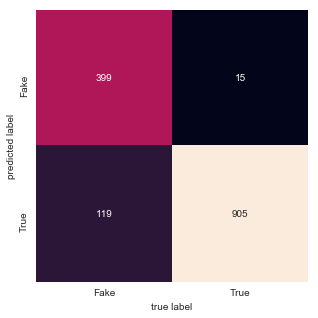

In [165]:
# plot the confusion matrix
labels = ['Fake', 'True']
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=label_name, yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label')


In [176]:
from sklearn.neural_network import MLPClassifier

In [178]:
model2 = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(200,200,200,200, ), verbose = True))
model2.fit(x_train_title, y_train)
pred2 = model2.predict(x_test_title)

Iteration 1, loss = 0.57872058
Iteration 2, loss = 0.14476254
Iteration 3, loss = 0.01443936
Iteration 4, loss = 0.00206390
Iteration 5, loss = 0.00042157
Iteration 6, loss = 0.00029928
Iteration 7, loss = 0.00026620
Iteration 8, loss = 0.00025044
Iteration 9, loss = 0.00024038
Iteration 10, loss = 0.00023209
Iteration 11, loss = 0.00022225
Iteration 12, loss = 0.00021512
Iteration 13, loss = 0.00021154
Iteration 14, loss = 0.00020941
Iteration 15, loss = 0.00020780
Iteration 16, loss = 0.00020639
Iteration 17, loss = 0.00020510
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [179]:
f1_score(y_test, pred2, average = 'macro')

0.9298144518180887

In [209]:
f1_score(y_test, pred2, average = 'micro')

0.935326842837274

In [184]:
model3 = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(50, ), verbose = True))
model3.fit(x_train_title, y_train)
pred3 = model3.predict(x_test_title)
f1_score(y_test, pred3, average = 'macro')

Iteration 1, loss = 0.72492505
Iteration 2, loss = 0.61640651
Iteration 3, loss = 0.48880232
Iteration 4, loss = 0.36929838
Iteration 5, loss = 0.27588472
Iteration 6, loss = 0.20904614
Iteration 7, loss = 0.16243347
Iteration 8, loss = 0.12940727
Iteration 9, loss = 0.10540507
Iteration 10, loss = 0.08744336
Iteration 11, loss = 0.07353728
Iteration 12, loss = 0.06260078
Iteration 13, loss = 0.05394385
Iteration 14, loss = 0.04679443
Iteration 15, loss = 0.04108177
Iteration 16, loss = 0.03623122
Iteration 17, loss = 0.03221671
Iteration 18, loss = 0.02875323
Iteration 19, loss = 0.02589628
Iteration 20, loss = 0.02342234
Iteration 21, loss = 0.02123888
Iteration 22, loss = 0.01936575
Iteration 23, loss = 0.01775930
Iteration 24, loss = 0.01632999
Iteration 25, loss = 0.01508094
Iteration 26, loss = 0.01397238
Iteration 27, loss = 0.01296217
Iteration 28, loss = 0.01209215
Iteration 29, loss = 0.01130194
Iteration 30, loss = 0.01058671
Iteration 31, loss = 0.00993870
Iteration 32, los

0.9304210625966403

In [208]:
f1_score(y_test, pred3, average = 'micro')

0.9360222531293463

In [185]:
x_train_title.shape

(5750,)

Text(28.6, 0.5, 'predicted label')

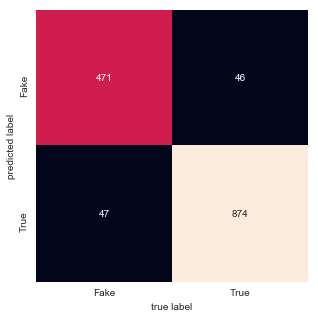

In [206]:
label_name = ['Fake', 'True']
mat = confusion_matrix(y_test, pred2, labels = label_name )
labels = ['Fake_News', 'True_News']
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=label_name, yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label')